# Example 4
In this example, we detect core-periphery structure in the airport networks 

# Packages

In [138]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.insert(0, "/Users/skojaku-admin/program/core-periphery-detection")
import cpnet

import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx
import numpy as np
import pandas as pd
import matplotlib as mpl

# import utils
from scipy import sparse

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

The worldwide airport network constructed from the openflight data.

Data source: 
- http://opsahl.co.uk/tnet/datasets/openflights.txt
- http://opsahl.co.uk/tnet/datasets/openflights_airports.txt
- https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv

Code to generate this network
- https://github.com/skojaku/core-periphery-detection/blob/add-notebook/scripts/generate-airport-net.py

In [106]:
# Node attributes
node_table = pd.read_csv(
    "https://raw.githubusercontent.com/skojaku/core-periphery-detection/add-notebook/data/node-table-airport.csv?token=AEJQ7B3DPCQGR4NXTZAFF3K7OZGTQ"
)

# Edge table
edge_table = pd.read_csv(
    "https://raw.githubusercontent.com/skojaku/core-periphery-detection/add-notebook/data/edge-table-airport.csv?token=AEJQ7B6PFAXLB6DEH4UDLXS7OZGYA"
)

In [107]:
G = nx.from_pandas_edgelist(edge_table)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 2905
Number of edges: 15645
Average degree:  10.7711


# Detect core-periphery structure

In [143]:
# Detect core-periphery structure
kmconfig = cpnet.KM_config()  # Call the BE algorithm
kmconfig.detect(G)  # Detect core-periphery structures
c = kmconfig.get_pair_id()  # Get the group membership of nodes
x = kmconfig.get_coreness()  # Get the coreness of nodes

# Statistical test

In [144]:
sig_c, sig_x, significant, p_values = cpnet.qstest(
    c, x, G, kmconfig, significance_level=0.05, num_of_rand_net=100, num_of_thread=4
)

100%|██████████| 100/100 [00:50<00:00,  1.98it/s]


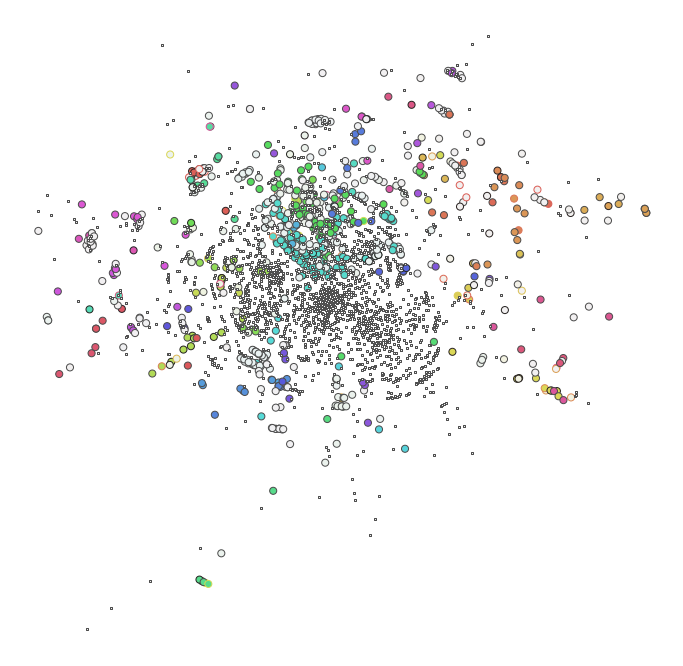

In [145]:
# Visualization
fig = plt.figure(figsize=(12, 12))
ax = plt.gca()

draw_nodes_kwd = {"node_size": 50, "linewidths": 1}
ax, pos = cpnet.utils.draw(
    G, sig_c, sig_x, ax, draw_nodes_kwd=draw_nodes_kwd, draw_edge=False
)

# Interactive plot

Please make sure that your jupyter lab or notebook has an extention for plotly. See [the instruction](https://plotly.com/python/getting-started/) to install the extention.

With conda, run

```bash
conda install nodejs
conda install jupyterlab "ipywidgets=7.5"
jupyter labextension install jupyterlab-plotly@4.10.0
jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@4.10.0
```

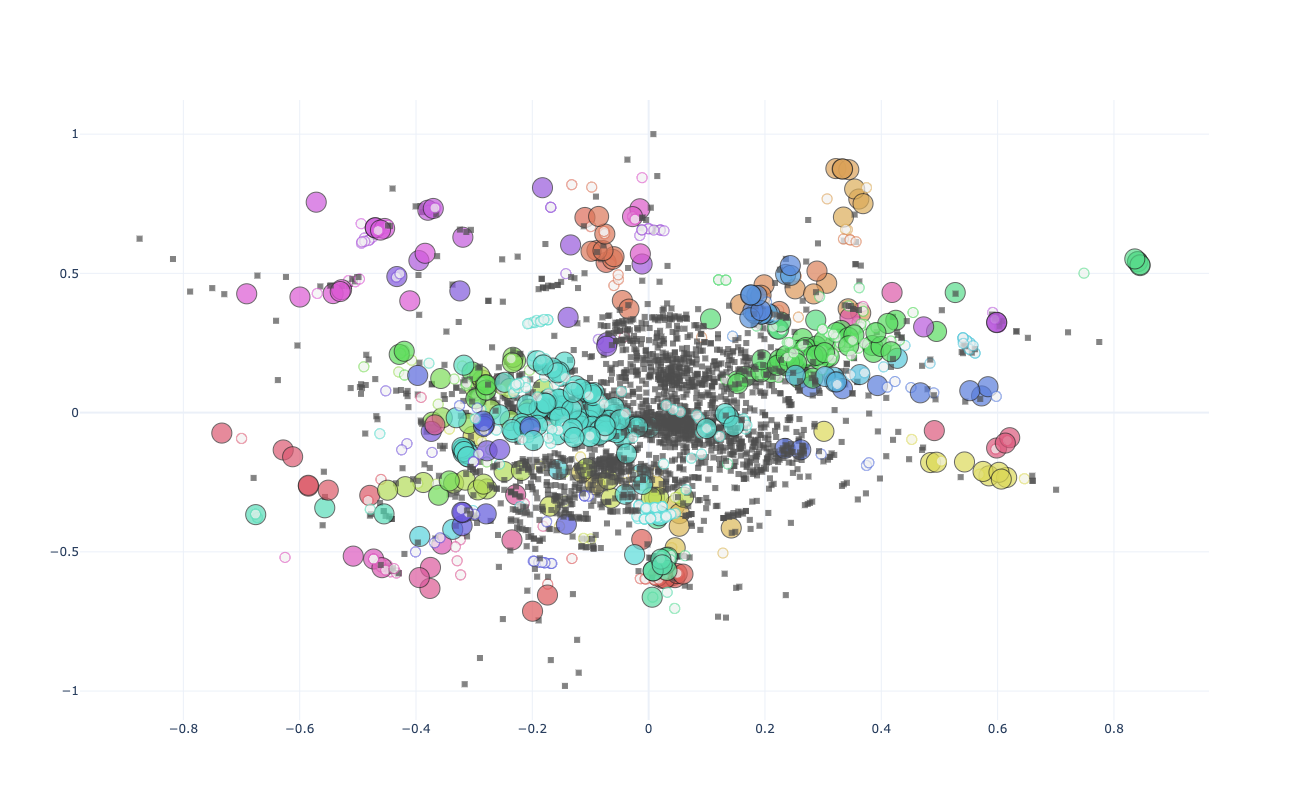

In [146]:
hover_text = {
    row["id"]: "Airport: {Name}<br>Country: {Country}<br> Region: {region}".format(
        **row
    )
    for i, row in node_table.iterrows()
}
fig = cpnet.utils.draw_interactive(G, sig_c, sig_x, hover_text=hover_text)
fig.show()